# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

In [1]:
import numpy as np
import pandas as pd
import platform
import statsmodels
print('Python version: ', platform.python_version())
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)
print('statsmodels version: ', statsmodels.__version__)

Python version:  3.11.4
numpy version:  1.24.4
pandas version:  2.0.3
statsmodels version:  0.14.0


You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


==> ENTER YOUR RESPONSE HERE

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [4]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [5]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [6]:
# Get data types of columns
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Get basic information about the dataset.

In [7]:
# Get basic information
### YOUR CODE HERE ###
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Generate basic descriptive statistics about the dataset.

In [8]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [10]:
# 可以看到缺失值主要是连续数值，比例是298/19382，约等于1.5%，缺失值数量占比不大，从业务角度看，这部分数据都是和视频播放相关的，
# 也有可能是这部分视频还没有播放相关的数据，才导致的缺失，由于缺失值占比非常小，而且有可能没有实际的业务意义，所以采取直接删除的做法
# Drop rows with missing values
### YOUR CODE HERE ###
data.dropna(inplace = True)

In [11]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


Check for and handle duplicates.

In [12]:
# Check for duplicates
### YOUR CODE HERE ###
data[data.duplicated()].count()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

Check for and handle outliers.

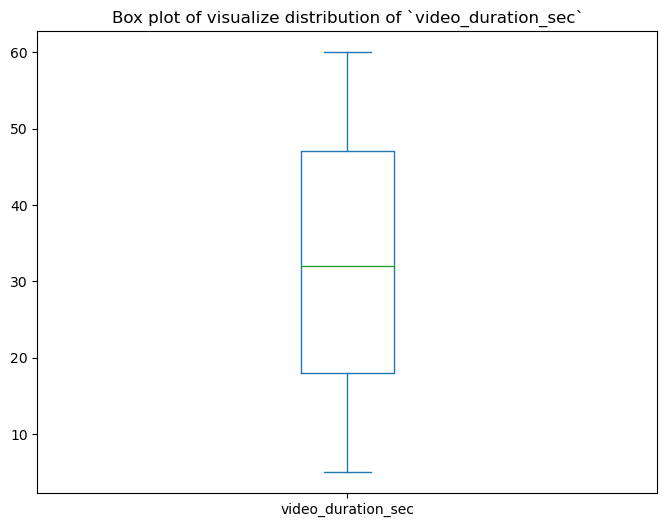

In [13]:
# Create a boxplot to visualize distribution of `video_duration_sec`
### YOUR CODE HERE ###
data['video_duration_sec'].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of visualize distribution of `video_duration_sec`')
plt.show()
# 可以看到视频播放时长不存在异常值

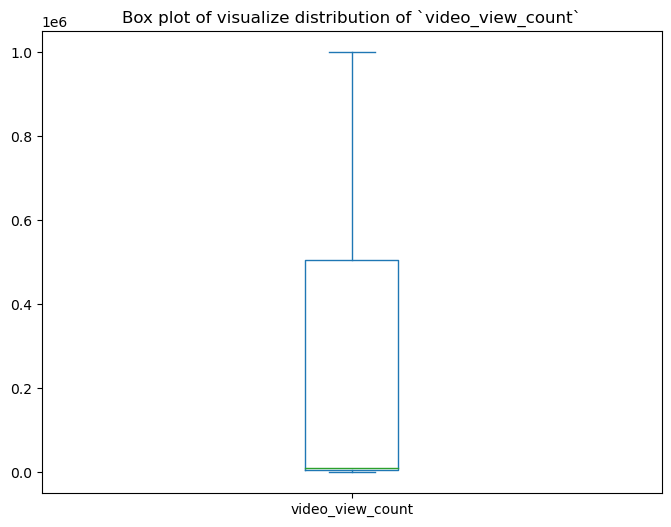

In [14]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
data['video_view_count'].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of visualize distribution of `video_view_count`')
plt.show()
# 可以看到视频的观看次数也不存在明显的异常值

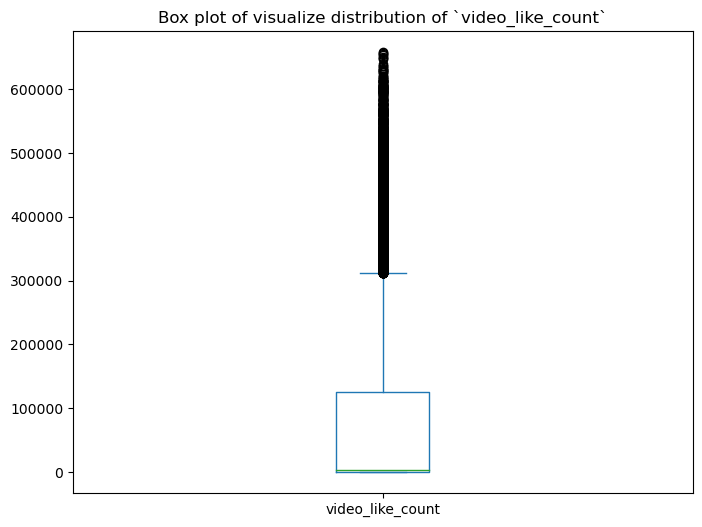

In [15]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###
data['video_like_count'].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of visualize distribution of `video_like_count`')
plt.show()
# 视频点赞次数有一部分超出上限的异常值，从业务角度看可能有小部分视频在传播中收到了高度的欢迎，导致了非常高的点赞数，所以这部分异常值可以保留

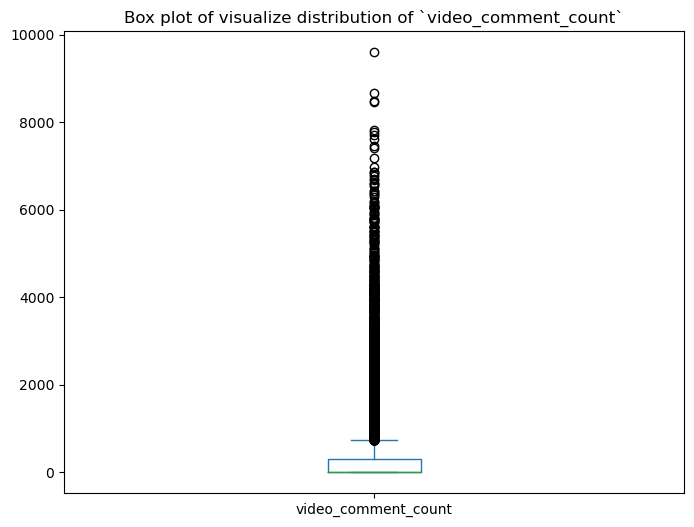

In [16]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###
data['video_comment_count'].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of visualize distribution of `video_comment_count`')
plt.show()
# 视频评论数量的异常值和点赞量的异常值很像，原因也相同，所以得到保留

In [17]:
# Check for and handle outliers for video_like_count
### YOUR CODE HERE ###
data1 = data[(data['video_like_count'] > 300000)]
data1.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
12,13,claim,3609761483,51,someone shared with me that the longest record...,not verified,active,700081.0,434565.0,97995.0,2408.0,1411.0
13,14,claim,3850678773,20,someone shared with me that 1920 was the last ...,not verified,under review,929685.0,497236.0,154917.0,1225.0,805.0
27,28,claim,6569363811,22,someone shared with me that sneezing while tra...,not verified,under review,812056.0,329068.0,3515.0,5200.0,1108.0
28,29,claim,6301836558,21,someone shared with me that people don’t sneez...,not verified,active,677855.0,332569.0,97961.0,5531.0,2386.0


Check class balance of the target variable. Remember, the goal is to predict whether the user of a given post is verified or unverified.

In [18]:
# Check class balance
### YOUR CODE HERE ###
data['verified_status'].value_counts()

verified_status
not verified    17884
verified         1200
Name: count, dtype: int64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [19]:
# 经过之前的假设检验，我们发现验证账户发布的视频普遍商业价值更高，所以在业务实际中，我们更希望模型可以尽可能把验证账户都捕捉到，也就是说我们希望有更高的召回率
# 同时，由于数据集中验证账户的视频占比太低，所以采取升采样的办法来处理数据集
# 还有一种办法是直接训练逻辑回归，观察混淆矩阵、F1、AUC等指标。然后使用 class_weight='balanced' 重新训练，对比性能提升。若上述方法不足，对训练集进行SMOTE或欠采样后重新训练，并通过交叉验证确保泛化性。
from sklearn.utils import resample

In [20]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
data = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [21]:
# 由于视频文本是没有办法作为变量加入模型的，所以这里考虑抽取文本的长度，来加入模型，至于是否是有效的特征，还需要后续的探究
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
### YOUR CODE HERE ###
data['text_length'] = data['video_transcription_text'].apply(len)
group1 = data.groupby(['verified_status'])['text_length'].mean()
group1
# 可以看到经过验证与未经验证的视频账户在视频长度上是有分别的，从业务实际角度来看，经过验证的视频账户也许需要更专业的，更有设计的文本从而导致文本更长
# 不过是否就要加入其作为模型中的自变量之一，还需进一步观察

verified_status
not verified    89.401141
verified        84.569559
Name: text_length, dtype: float64

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [22]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'text_length'],
      dtype='object')

In [23]:
# Display first few rows of dataframe after adding new column
### YOUR CODE HERE ###
data.head(3)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

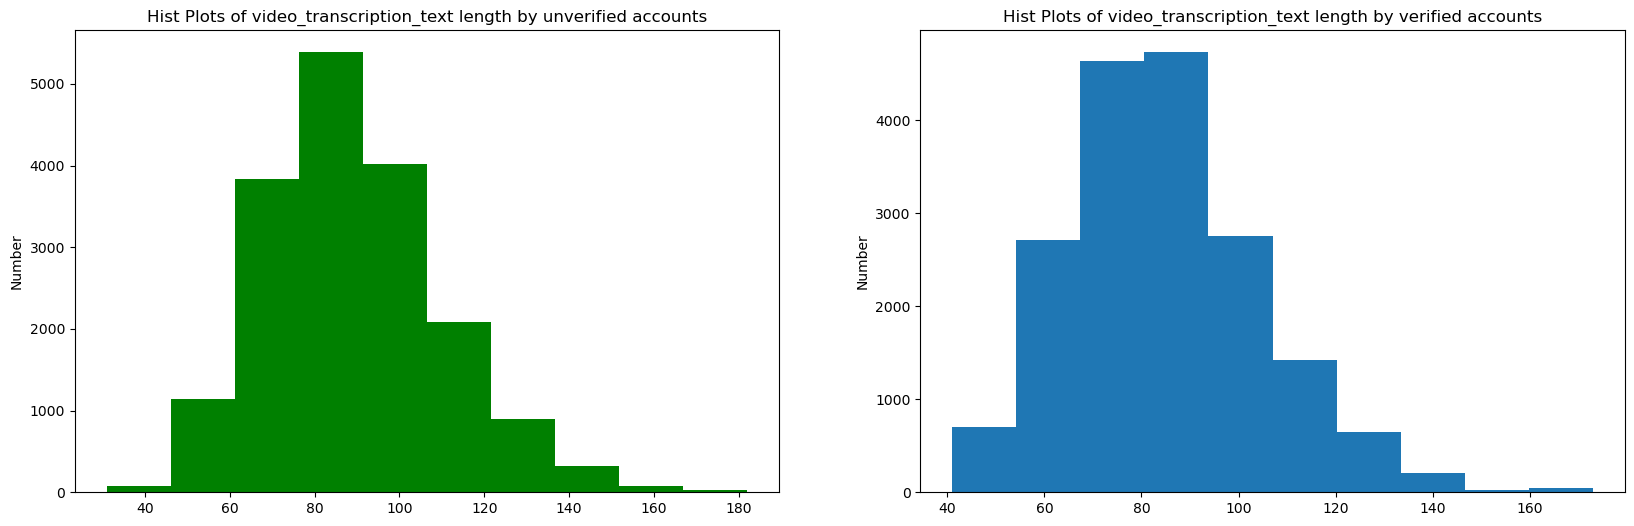

In [25]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
### YOUR CODE HERE ###
data_not_verified = data[data["verified_status"] == "not verified"]
data_verified = data[data["verified_status"] == "verified"]

fig = plt.figure() #使用 matplotlib.pyplot 中的 figure 方法创建一个新的图形对象，并将其存储在 fig 变量中。

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2)

data_not_verified['text_length'].plot(kind='hist', color='green', figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Hist Plots of video_transcription_text length by unverified accounts')
ax0.set_ylabel('Number')

# Subplot 2: Line plot
data_verified['text_length'].plot(kind='hist', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Hist Plots of video_transcription_text length by verified accounts')
ax1.set_ylabel('Number')

plt.show()
# 经过直方图的可视化，可以看到两者都接近符合正态分布，但是经过验证的账户峰值更宽

In [28]:
# 最后做一个简单的单变量逻辑回归，观察文本长度和验证状态的AUC值
# AUC值是指ROC曲线中，曲线之下的面积占比，越接近1代表模型能力越强，越接近0.5越接近随机猜测

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
model = LogisticRegression(class_weight='balanced')
model.fit(data[['text_length']], data['verified_status'])
prob = model.predict_proba(data[['text_length']])[:,1]
print(f"单变量AUC: {roc_auc_score(data['verified_status'], prob):.3f}")
# 经过建模，AUC值=0.568并不高，可以先把它纳入特征范围，之后可以再观察不纳入的情况，以及尝试使用分箱处理

单变量AUC: 0.568


### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [29]:
# Code a correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
numerical_columns = data.select_dtypes(include=['number']).columns

# 计算数值型列的相关系数矩阵
corr_matrix = data[numerical_columns].corr()
corr_matrix

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.581483,-0.504015,-0.487096,-0.413799,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.006507,0.010515,0.008753,0.013983,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004890,0.002206,0.003989,-0.004586,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.832832,0.711313,0.690048,0.583485,0.244693
video_like_count,-0.581483,0.006507,0.004890,0.832832,1.000000,0.850053,0.828082,0.706140,0.202386
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.850053,1.000000,0.710117,0.620182,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.828082,0.710117,1.000000,0.857679,0.173396
video_comment_count,-0.413799,0.013983,-0.004586,0.583485,0.706140,0.620182,0.857679,1.000000,0.149750
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.202386,0.171651,0.173396,0.149750,1.000000


Visualize a correlation heatmap of the data.

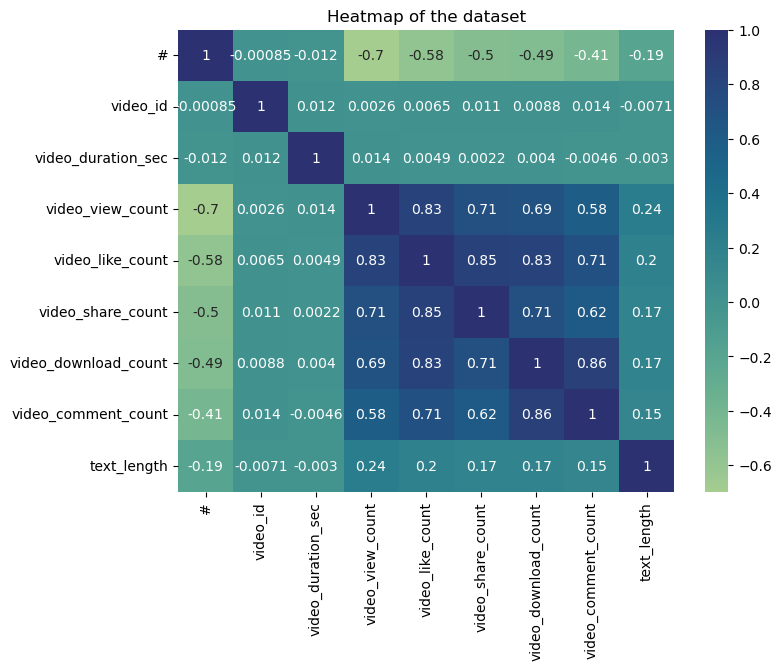

In [30]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

In [31]:
# 因为从热图中看到和视频观看相关的几个数据，相关性都相对较高，所以计算一下方差膨胀因子，来帮助判断是否存在多重共线性
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 选择需要计算 VIF 的列
selected_columns = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']
X = data[selected_columns]

# 添加常数项（截距）
import statsmodels.api as sm
X = sm.add_constant(X)

# 计算 VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 打印 VIF 结果
print("\nVariance Inflation Factor (VIF):")
print(vif_data)
# 可以看到video_like_count和video_download_count两列数据的方差膨胀因子都超过了5，存在多重共线性的可能性很高，所以后续会舍弃这两个特征


Variance Inflation Factor (VIF):
                Feature       VIF
0                 const  1.373692
1      video_view_count  3.265301
2      video_like_count  7.899558
3     video_share_count  3.617348
4  video_download_count  6.038987
5   video_comment_count  3.795266


In [32]:
data['claim_status'].value_counts()

claim_status
opinion    23265
claim      12503
Name: count, dtype: int64

In [33]:
data['author_ban_status'].value_counts()

author_ban_status
active          30344
under review     3191
banned           2233
Name: count, dtype: int64

In [34]:
# 对于claim_status和author_ban_status这两个分类变量，使用卡方独立性检验来查看它们和验证状态之间是否存在相关性

from scipy.stats import chi2_contingency

# 计算交叉表
contingency_table = pd.crosstab(data['claim_status'], data['verified_status'])

# 进行卡方独立性检验
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 打印卡方检验结果
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# p 值非常小（接近 0），表明这两个变量之间存在显著的相关性。


Chi-Square Test Results:
Chi-Square Statistic: 4871.142627804144
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
 [[ 6251.5  6251.5]
 [11632.5 11632.5]]


In [35]:
contingency_table = pd.crosstab(data['author_ban_status'], data['verified_status'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# 可以看到两次卡方独立性检验的p值都远小于0.05，说明claim_status和author_ban_status和验证状态之间存在明显的相关关系


Chi-Square Test Results:
Chi-Square Statistic: 694.8039062105993
P-value: 1.3342854922817216e-151
Degrees of Freedom: 2
Expected Frequencies:
 [[15172.  15172. ]
 [ 1116.5  1116.5]
 [ 1595.5  1595.5]]


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [36]:
# Select outcome variable
### YOUR CODE HERE ###
X = data[['claim_status','video_duration_sec','author_ban_status','video_view_count','video_share_count','video_comment_count','text_length']]
Y = data['verified_status']

Select the features.

In [37]:
# Select features
### YOUR CODE HERE ###


# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,claim_status,video_duration_sec,author_ban_status,video_view_count,video_share_count,video_comment_count,text_length
0,claim,59,under review,343296.0,241.0,0.0,97
1,claim,32,active,140877.0,19034.0,684.0,107
2,claim,31,active,902185.0,2858.0,329.0,137
3,claim,25,active,437506.0,34812.0,584.0,131
4,claim,19,active,56167.0,4110.0,152.0,128


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [38]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [39]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25037, 7), (10731, 7), (25037,), (10731,))

### **Task 3c. Encode variables**

Check the data types of the features.

In [40]:
# Check data types
### YOUR CODE HERE ###
X_train.dtypes

claim_status            object
video_duration_sec       int64
author_ban_status       object
video_view_count       float64
video_share_count      float64
video_comment_count    float64
text_length              int64
dtype: object

In [41]:
# Get unique values in `claim_status`
### YOUR CODE HERE ###
X_train['claim_status'].unique()

array(['claim', 'opinion'], dtype=object)

In [42]:
# Get unique values in `author_ban_status`
### YOUR CODE HERE ###
X_train['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

In [45]:
from sklearn.preprocessing import OneHotEncoder

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [43]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

# Display first few rows
X_train_to_encode.head()

,claim_status,author_ban_status
32925,claim,active
4266,claim,active
24979,opinion,active
24074,opinion,active
32056,opinion,active


In [46]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)
# 删除第一列防止出现多长共线性，如果是非线性模型，可以省去

In [47]:
# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [48]:
# 返回经过编码后生成的特征名称
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [49]:
# Display first few rows of encoded training features
X_train_encoded

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [50]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [51]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_comment_count,text_length
32925,52,599928.0,13752.0,1189.0,67
4266,25,623816.0,59817.0,2544.0,100
24979,44,6575.0,9.0,0.0,91
24074,30,389.0,40.0,1.0,68
32056,9,4244.0,94.0,14.0,83


In [52]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_comment_count,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,52,599928.0,13752.0,1189.0,67,0.0,0.0,0.0
1,25,623816.0,59817.0,2544.0,100,0.0,0.0,0.0
2,44,6575.0,9.0,0.0,91,1.0,0.0,0.0
3,30,389.0,40.0,1.0,68,1.0,0.0,0.0
4,9,4244.0,94.0,14.0,83,1.0,0.0,0.0


Check the data type of the outcome variable.

In [53]:
# Check data type of outcome variable
### YOUR CODE HERE ###
y_train.dtype

dtype('O')

In [54]:
# Get unique values of outcome variable
### YOUR CODE HERE ###
y_train.unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [55]:
# Set up an encoder for one-hot encoding the categorical outcome variable
### YOUR CODE HERE ###
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [56]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 0., 1., ..., 1., 1., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [57]:
# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
log_clf = LogisticRegression(random_state=0, max_iter=800)
log_clf.fit(X_train_final, y_train_final)

LogisticRegression(max_iter=800, random_state=0)

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [58]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Display first few rows
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [59]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [60]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [61]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_comment_count,text_length
21061,41,2118.0,57.0,2.0,50
31748,27,5701.0,157.0,0.0,78
20197,31,449767.0,75385.0,1789.0,127
5727,19,792813.0,56597.0,3413.0,105
11607,54,2044.0,68.0,2.0,51


In [62]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_comment_count,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,2.0,50,1.0,0.0,0.0
1,27,5701.0,157.0,0.0,78,1.0,0.0,0.0
2,31,449767.0,75385.0,1789.0,127,0.0,0.0,0.0
3,19,792813.0,56597.0,3413.0,105,0.0,0.0,0.0
4,54,2044.0,68.0,2.0,51,1.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [63]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)

Display the predictions on the encoded testing set.

In [64]:
# Display the predictions on the encoded testing set
y_pred

array([1., 1., 0., ..., 1., 1., 1.])

Display the true labels of the testing set.

In [65]:
# Display the true labels of the testing set
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14615    not verified
11828    not verified
17480    not verified
22737        verified
22849        verified
Name: verified_status, Length: 10731, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [66]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [67]:
# Get shape of each training and testing set
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((25037, 8), (25037,), (10731, 8), (10731,))

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

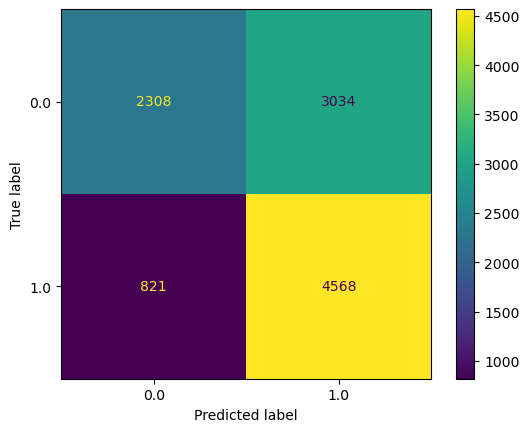

In [70]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [71]:
# Create classification report for logistic regression model
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.43      0.54      5342
not verified       0.60      0.85      0.70      5389

    accuracy                           0.64     10731
   macro avg       0.67      0.64      0.62     10731
weighted avg       0.67      0.64      0.62     10731



**类别性能不平衡**

​验证账户（verified）​：
​召回率（Recall）仅43%：模型漏检了57%的真实验证账户（821个被误判为未验证），这对需要高召回的场景（如风险审核）是严重问题。
​高精确率（74%）​：预测为验证账户的样本中74%正确，说明模型对此类判断较谨慎。
​未验证账户（not verified）​：
​召回率高达85%：模型捕捉到了大多数未验证账户，但精确率仅60%，说明有大量误判（3034个未验证账户被误判为已验证）。

**全局指标问题**

​准确率64%：低于平衡数据集的理论基线（约50%），说明模型整体判别能力有限。
​宏平均F1=0.62：两类性能差异大（verified的F1=0.54 vs not verified=0.70），需针对性优化。

### **Task 4c. Interpret model coefficients**

In [72]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
### YOUR CODE HERE ###
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,1.340751e-03
1,video_view_count,-2.686563e-06
2,video_share_count,3.758094e-06
3,video_comment_count,5.079031e-05
4,text_length,3.482644e-03
5,claim_status_opinion,5.988120e-05
6,author_ban_status_banned,-2.516165e-06
7,author_ban_status_under review,2.497979e-08


## 关键正向特征

​**text_length（系数=0.0035）​**：
文本长度与验证状态正相关，符合验证账户（如机构号）需详细描述的业务假设，但系数绝对值较小，建议分箱或标准化放大作用。
​**video_duration_sec（系数=0.0013）​**：
视频时长增加可能对应专业内容，但贡献微弱，需结合业务判断是否保留。

## 异常负向特征

​**video_view_count（系数=-2.68e-6）​**：
观看次数与验证状态负相关，可能反映未验证账户（如娱乐内容）更易获得流量，需验证是否与业务逻辑冲突。
​**author_ban_state_banned（系数=-2.51e-6）​**：
被封禁作者状态影响微弱且方向不明，建议剔除以简化模型。

## 特征工程优化方向

**变量标准化：**如未标准化，系数大小不可比（例如text_length单位为字符，video_view_count为次数），需进行Z-score标准化或Min-Max缩放。
​**非线性处理：**对text_length分箱（如短/中/长文本），或引入多项式项（如text_length^2）。

### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

==> ENTER YOUR RESPONSE TO QUESTIONS 1 AND 2 HERE

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 